<a href="https://colab.research.google.com/github/saishdesai23/Profile-based-Candidate-Job-Recommendation-System/blob/main/Job_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Job Recommendation Sytem
Our Objective here is that for the given datasets, we will build a system which will reccommend jobs for a given applicant.
## Authors -
Anish Shetty

Asmita Dabholkar

Saish Desai

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing required libraries:

In [102]:
# importing libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing packages for text pre-porcessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
import re 
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###  

Importing the jobs dataset:

In [103]:
jobs_data = pd.read_csv("/content/drive/MyDrive/Text_Mining_Final_Project/Job_Recommendation_System/data/Combined_Jobs_Final.csv")
jobs_data.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


We will only extract the columns ‘Job.ID’, ‘Title’, ‘Position’, ‘Company’, ’City’, ’Job_Description’ needed for creating the recommendation system

In [104]:
jobs_data = jobs_data[['Job.ID', 'Title', 'Position', 'Company', 'City', 'Employment.Type','Job.Description']]

In [105]:
jobs_data.head()

,Job.ID,Title,Position,Company,City,Employment.Type,Job.Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


## 3. Data Cleaning for the Job Description

### 1. Identifying null values in the data set
Here, we tabulate the null counts for the selected columns in the data set.

In [106]:
col_null_value = list(jobs_data.isnull().sum())
col_names = list(jobs_data.columns)
null_value_data = pd.DataFrame(zip(col_names, col_null_value),columns =['Column_name', 'Null_count'])
null_value_data

,Column_name,Null_count
0,Job.ID,0
1,Title,0
2,Position,0
3,Company,2271
4,City,135
5,Employment.Type,10
6,Job.Description,56


Now we visualize the null value count for each column using a bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


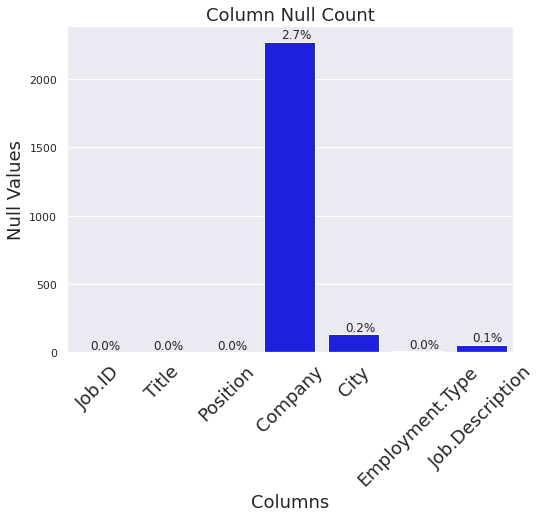

In [107]:
plt.figure(figsize=(8,6))
sns.set()

# bar plot
sns.barplot(null_value_data['Column_name'],null_value_data['Null_count'], color = "blue")
ax = plt.gca()

# adding null percentage value to the data bar plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.5,
            height + 2,
            str(100*round(int(height)/jobs_data.shape[0], 3)) +"%",
            fontsize=12, ha='center', va='bottom')
  
# Labeling the plot
plt.title("Column Null Count", fontsize=18)
ax.set_xlabel("Columns", fontsize =18)
ax.set_ylabel("Null Values", fontsize =18)
plt.xticks(rotation=45, fontsize =18)

plt.show()

Now let's look at the observations with null values for the column 'City'

In [108]:
df_null_city = jobs_data[pd.isnull(jobs_data['City'])]
print("The missing value count for the column city:", df_null_city.shape[0])
df_null_city.head()

The missing value count for the column city: 135


,Job.ID,Title,Position,Company,City,Employment.Type,Job.Description
3425,142044,Registered Nurse (RN) @ St. Francis Hospital,Registered Nurse (RN),St. Francis Hospital,NaN,Full-Time/Part-Time,Under the direction of the Clinical Coordinato...
3433,142054,Sales Representative - Business Development Op...,Sales Representative - Business Development Op...,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3434,142055,New Business Executive @ CHI Payment Systems,New Business Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3435,142056,Outside Sales Representative (Business Develop...,Outside Sales Representative (Business Develop...,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."
3436,142057,Outside Sales Representative @ CHI Payment Sys...,Outside Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,"If you&rsquo;re energetic, motivated, hardwork..."


In [109]:
df_null_city.groupby(['Company'])['City'].count() 

Company
Academic Year In America                0
CBS Healthcare Services and Staffing    0
CHI Payment Systems                     0
Driveline Retail                        0
Educational Testing Services            0
Genesis Health System                   0
Genesis Health Systems                  0
Home Instead Senior Care                0
St. Francis Hospital                    0
Volvo Group                             0
Name: City, dtype: int64

After grouping all the null values into different companies, we observed that missing values come from above listed 10 companies. So, we will replace all the null values with headquarter locations for the cities.

In [111]:
jobs_data['Company'] = jobs_data['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
jobs_data.loc[jobs_data.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
jobs_data.loc[jobs_data.Company == 'Academic Year In America', 'City'] = 'Stamford'
jobs_data.loc[jobs_data.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
jobs_data.loc[jobs_data.Company == 'Driveline Retail', 'City'] = 'Coppell'
jobs_data.loc[jobs_data.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
jobs_data.loc[jobs_data.Company == 'Genesis Health System', 'City'] = 'Davennport'
jobs_data.loc[jobs_data.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
jobs_data.loc[jobs_data.Company == 'St. Francis Hospital', 'City'] = 'New York'
jobs_data.loc[jobs_data.Company == 'Volvo Group', 'City'] = 'Washington'
jobs_data.loc[jobs_data.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'



Observing the updated missing value count

In [112]:
col_null_value = list(jobs_data.isnull().sum())
col_names = list(jobs_data.columns)
null_value_data = pd.DataFrame(zip(col_names, col_null_value),columns =['Column_name', 'Null_count'])
null_value_data

,Column_name,Null_count
0,Job.ID,0
1,Title,0
2,Position,0
3,Company,2271
4,City,0
5,Employment.Type,10
6,Job.Description,56


Null values from the employment type column are from Uber. So we will assume that the employment type will be "Full-Time/Part-Time".

In [114]:
df_null_emp = jobs_data[pd.isnull(jobs_data['Employment.Type'])]
df_null_emp.head()

,Job.ID,Title,Position,Company,City,Employment.Type,Job.Description
10768,153197,Driving Partner @ Uber,Driving Partner,Uber,San Francisco,NaN,Uber is changing the way the world moves. From...
10769,153198,Driving Partner @ Uber,Driving Partner,Uber,Los Angeles,NaN,Uber is changing the way the world moves. From...
10770,153199,Driving Partner @ Uber,Driving Partner,Uber,Chicago,NaN,Uber is changing the way the world moves. From...
10771,153200,Driving Partner @ Uber,Driving Partner,Uber,Boston,NaN,Uber is changing the way the world moves. From...
10772,153201,Driving Partner @ Uber,Driving Partner,Uber,Ann Arbor,NaN,Uber is changing the way the world moves. From...


In [115]:
jobs_data['Employment.Type'].unique()
jobs_data['Employment.Type']=jobs_data['Employment.Type'].fillna('Full-Time/Part-Time')
jobs_data.groupby(['Employment.Type'])['Company'].count()
jobs_data.head()

,Job.ID,Title,Position,Company,City,Employment.Type,Job.Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


We will now combine textual data from all the columns into a common column named "text". Texts from this columns will undergo text preprocessing and vectorization to identify similarity between the jab decriptions and employee qualifications and application data.

In [116]:
jobs_data["text"] = jobs_data["Position"].map(str) + " " + jobs_data["Company"] +" "+ jobs_data["City"]+ " "+jobs_data['Employment.Type']+" "+jobs_data['Job.Description'] +" "+jobs_data['Title']
jobs_data = jobs_data[['Job.ID', 'text','Title','Job.Description']]
jobs_data = jobs_data.fillna(" ")
jobs_data.head()

,Job.ID,text,Title,Job.Description
0,111,Server Tacolicious Palo Alto Part-Time Tacolic...,Server @ Tacolicious,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef Claude Lane San Francisco P...,Kitchen Staff/Chef @ Claude Lane,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender Machka Restaurants Corp. San Francis...,Bartender @ Machka Restaurants Corp.,We are a popular Mediterranean wine bar and re...
3,121,Server Teriyaki House Brisbane Part-Time ● Se...,Server @ Teriyaki House,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,"Located at the heart of Hollywood, we are one ..."


For our recommendation we will only need the following three columns-
1) Job ID

2) text - textual data pertaining to the jobs

3) Title - title of the job

As a final proces we will replace all the remaining null values with a blank space to avoid errors while pre-processing the data.

In [118]:
df_all = jobs_data[['Job.ID', 'text', 'Title']]
df_all = df_all.fillna(" ")
df_all = df_all[:10000]
df_all.head()

,Job.ID,text,Title
0,111,Server Tacolicious Palo Alto Part-Time Tacolic...,Server @ Tacolicious
1,113,Kitchen Staff/Chef Claude Lane San Francisco P...,Kitchen Staff/Chef @ Claude Lane
2,117,Bartender Machka Restaurants Corp. San Francis...,Bartender @ Machka Restaurants Corp.
3,121,Server Teriyaki House Brisbane Part-Time ● Se...,Server @ Teriyaki House
4,127,Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset


We have defined a text data pre-processing and cleaning function to perform te following tasks

1) Case-Folding

2) HTML and XML tag removal

3) Non-alphabetic character removal using regex

4) Lemmatizing the words to identiy lemma (root) of each word in the text

5) Stopword removal

6) Word truncation

In [119]:
wnl = WordNetLemmatizer()

def text_clean_preprocess(raw_text : str):
    """
    This function will clean the data and perform certain preprocessing step of stemming/lemmatizing the words in 
    the tweet. Finally the function will remove stopwords and will only consider with words with a character length
    ranging from 2 to 10
    """
    newString = raw_text.lower() 
    newString = BeautifulSoup(newString, "lxml").text 
    text = re.sub("[^a-zA-Z]"," ", newString) 
    text = re.sub("'","", text)
    text = re.sub("\\d|\\W"," ", text)
    words = text.split()
    meaningful_words = [wnl.lemmatize(w) for w in words if w not in stopwords.words("english") and 2< len(w)<=15]
    return " ".join(meaningful_words)  

In [120]:
df_all['text'] = df_all['text'].apply(text_clean_preprocess)
df_all.head()

,Job.ID,text,Title
0,111,server tacolicious palo alto part time tacolic...,Server @ Tacolicious
1,113,kitchen staff chef claude lane san francisco p...,Kitchen Staff/Chef @ Claude Lane
2,117,bartender machka restaurant corp san francisco...,Bartender @ Machka Restaurants Corp.
3,121,server teriyaki house brisbane part time serve...,Server @ Teriyaki House
4,127,kitchen staff chef rosa mexicano sunset los an...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset


Now, we will use tf-idf, to vectorize the data

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# vectorizing the textual data from the dataframe and storing the data in an array
job_vector = tfidf_vectorizer.fit_transform((df_all['text'])) 
job_vector

#print(job_vector.toarray())

<10000x17926 sparse matrix of type '<class 'numpy.float64'>'
	with 1020706 stored elements in Compressed Sparse Row format>

In [122]:
# Generating the dataframe of the vectorized data
job_vector_df = pd.DataFrame(job_vector.toarray(), columns = tfidf_vectorizer.get_feature_names())
job_vector_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaahc,aacn,aaha,aam,aamaz,aanac,aao,aap,aapc,...,zip,zipline,zoes,zone,zoned,zoo,zos,zseries,zurich,zwolinski
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each column in the data frame is a word from the vocabulary. Thus each word is treated as a feature.

Each row in the data frame pertains to a specific job id.

Each entry in the data frame is the "TF-IDF" score for paticular word in the job description .

## 4. Data Cleaning for the User data

Job View Data

In [123]:
# Job view data
job_view_data = pd.read_csv("/content/drive/MyDrive/Text_Mining_Final_Project/Job_Recommendation_System/data/Job_Views.csv")
job_view_data.head(5)

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC
2,10001,84141,Part Time Showroom Sales / Cashier @ Grizzly I...,Part Time Showroom Sales / Cashier,Grizzly Industrial Inc.,Bellingham,Washington,WA,NaN,2014-12-12 20:12:32 UTC,2014-12-12 20:17:18 UTC,286.0,2014-12-12 20:12:32 UTC,2014-12-12 20:12:32 UTC
3,10002,77989,Event Specialist Part Time @ Advantage Sales &...,Event Specialist Part Time,Advantage Sales & Marketing,Simpsonville,South Carolina,SC,NaN,2014-12-12 20:39:23 UTC,2014-12-12 20:42:13 UTC,170.0,2014-12-12 20:39:23 UTC,2014-12-12 20:39:23 UTC
4,10002,69568,Bonefish - Kitchen Staff @ Bonefish Grill,Bonefish - Kitchen Staff,Bonefish Grill,Greenville,South Carolina,SC,NaN,2014-12-12 20:43:25 UTC,2014-12-12 20:43:58 UTC,33.0,2014-12-12 20:43:25 UTC,2014-12-12 20:43:25 UTC


We will only select the columns 'Applicant.ID', 'Job.ID', 'Position', 'Company' and 'City'

In [124]:
job_view_data.loc[:,['Applicant.ID', 'Job.ID', 'Position', 'Company','City']].head()

,Applicant.ID,Job.ID,Position,Company,City
0,10000,73666,Cashiers & Valets Needed!,WallyPark,Newark
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City
2,10001,84141,Part Time Showroom Sales / Cashier,Grizzly Industrial Inc.,Bellingham
3,10002,77989,Event Specialist Part Time,Advantage Sales & Marketing,Simpsonville
4,10002,69568,Bonefish - Kitchen Staff,Bonefish Grill,Greenville


Here we will combine the textual data from the columns 'Position', 'City', 'Company' and apply the text pre-processing on the data. 

In [125]:
job_view_data = job_view_data.loc[:,['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
job_view_data["select_pos_com_city"] = job_view_data["Position"].map(str) + "  " + job_view_data["Company"] +"  "+ job_view_data["City"]
job_view_data['select_pos_com_city'] = job_view_data['select_pos_com_city'].map(str).apply(text_clean_preprocess)
job_view_data['select_pos_com_city'] = job_view_data['select_pos_com_city'].str.lower()
job_view_data = job_view_data[['Applicant.ID','select_pos_com_city']]
job_view_data.head(5)

,Applicant.ID,select_pos_com_city
0,10000,cashier valet needed wallypark newark
1,10000,macy seasonal retail fragrance cashier garden ...
2,10001,part time showroom sale cashier grizzly indust...
3,10002,event specialist part time advantage sale mark...
4,10002,bonefish kitchen staff bonefish grill greenville


In [126]:
job_view_data2 = job_view_data.groupby('Applicant.ID', sort=False)['select_pos_com_city'].apply(' '.join).reset_index()
job_view_data2.head()

,Applicant.ID,select_pos_com_city
0,10000,cashier valet needed wallypark newark macy sea...
1,10001,part time showroom sale cashier grizzly indust...
2,10002,event specialist part time advantage sale mark...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank cleveland


Experience Data

In [127]:
#Experience
experience_data = pd.read_csv("/content/drive/MyDrive/Text_Mining_Final_Project/Job_Recommendation_System/data/Experience.csv")
experience_data.head()

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
2,10001,Machine Operator,comptec inc,Custer,Washington,WA,1997-01-01,1999-01-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
3,10003,maintenance technician,Winn residental,washington,District of Columbia,DC,NaN,NaN,"Necessary maintenance for ""Make Ready"" Plumbin...",10.0,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
4,10003,Electrical Helper,michael and son services,alexandria,Virginia,VA,NaN,NaN,repair and services of electrical construction,NaN,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC


From the experience data, we will only extract the columns "Applicant.ID" and "Position.Name" and apply the text pre-processing function on the data

In [128]:
#taking only Position
experience_data= experience_data[['Applicant.ID','Position.Name']]
#cleaning the text
experience_data['Position.Name'] = experience_data['Position.Name'].map(str).apply(text_clean_preprocess)
experience_data.head()

,Applicant.ID,Position.Name
0,10001,account manager sale administration quality as...
1,10001,electronics technician item master controller
2,10001,machine operator
3,10003,maintenance technician
4,10003,electrical helper


In [129]:
experience_data =  experience_data.sort_values(by='Applicant.ID')
experience_data = experience_data.fillna(" ")
experience_data.head()

,Applicant.ID,Position.Name
2763,2,volunteer
2762,2,writer uloop blog
3759,3,marketing intern
3758,3,server
3757,3,prep cook


In [130]:
#adding same rows to a single row
experience_data = experience_data.groupby('Applicant.ID', sort=False)['Position.Name'].apply(' '.join).reset_index()
experience_data.head()

,Applicant.ID,Position.Name
0,2,volunteer writer uloop blog
1,3,marketing intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


Position of Interest Data

In [131]:
#Position of interest
poi_data =  pd.read_csv("/content/drive/MyDrive/Text_Mining_Final_Project/Job_Recommendation_System/data/Positions_Of_Interest.csv", sep=',')
poi_data = poi_data.sort_values(by='Applicant.ID')
poi_data.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1158,153,Sales Rep,2014-08-14 15:56:47 UTC,2015-03-02 02:13:08 UTC


In [132]:
# dropping the unwanted columns
poi_data = poi_data.drop('Updated.At', 1)
poi_data = poi_data.drop('Created.At', 1)

#cleaning the text
poi_data['Position.Of.Interest']=poi_data['Position.Of.Interest'].map(str).apply(text_clean_preprocess)
poi_data = poi_data.fillna(" ")
poi_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Applicant.ID,Position.Of.Interest
6437,96,server
1156,153,barista
1155,153,host
1154,153,server
1158,153,sale rep


In [133]:
poi_data = poi_data.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
poi_data.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,barista host server sale rep customer service rep
2,256,host production area sale rep customer service...
3,438,customer service rep barista host server
4,568,receptionist customer service rep book keeper


We will now merge the "job_view_data" data frame with the "experience_data" data frame

In [134]:
#jobs_exp_data = job_view_data.merge(experience_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
#jobs_exp_data = jobs_exp_data.fillna(' ')
#jobs_exp_data = jobs_exp_data.sort_values(by='Applicant.ID')
#jobs_exp_data.head()

In [135]:
jobs_exp_data2 = job_view_data2.merge(experience_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
jobs_exp_data2 = jobs_exp_data2.fillna(' ')
#jobs_exp_data2 = jobs_exp_data2.sort_values(by='Applicant.ID')
jobs_exp_data2.head()

,Applicant.ID,select_pos_com_city,Position.Name
0,10000,cashier valet needed wallypark newark macy sea...,
1,10001,part time showroom sale cashier grizzly indust...,machine operator account manager sale administ...
2,10002,event specialist part time advantage sale mark...,
3,10003,entry level security officer securitas securit...,technician maintenance technician electrical h...
4,10004,teller chester east cleveland keybank cleveland,shift superviveur nan nan


Finally we will merge the "poi_data" dataframe with the existing dataframe.

In [136]:
#jobs_exp_poi_data = jobs_exp_data.merge(poi_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
#jobs_exp_poi_data = jobs_exp_poi_data.fillna(' ')
#jobs_exp_poi_data = jobs_exp_poi_data.sort_values(by='Applicant.ID')

# combining all columns
#jobs_exp_poi_data["text"] = jobs_exp_poi_data["select_pos_com_city"].map(str) + jobs_exp_poi_data["Position.Name"] +" "+ jobs_exp_poi_data["Position.Of.Interest"]
#jobs_exp_poi_data.head()

In [137]:
jobs_exp_poi_data2 = jobs_exp_data2.merge(poi_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
jobs_exp_poi_data2 = jobs_exp_poi_data2.fillna(' ')
#jobs_exp_poi_data = jobs_exp_poi_data.sort_values(by='Applicant.ID')

# combining all columns
jobs_exp_poi_data2["text"] = jobs_exp_poi_data2["select_pos_com_city"].map(str) + jobs_exp_poi_data2["Position.Name"] +" "+ jobs_exp_poi_data2["Position.Of.Interest"]
jobs_exp_poi_data2.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest,text
0,10000,cashier valet needed wallypark newark macy sea...,,,cashier valet needed wallypark newark macy sea...
1,10001,part time showroom sale cashier grizzly indust...,machine operator account manager sale administ...,,part time showroom sale cashier grizzly indust...
2,10002,event specialist part time advantage sale mark...,,,event specialist part time advantage sale mark...
3,10003,entry level security officer securitas securit...,technician maintenance technician electrical h...,security officer,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank cleveland,shift superviveur nan nan,,teller chester east cleveland keybank clevelan...


In [149]:
combined_user_data = jobs_exp_poi_data[['Applicant.ID','text']]
combined_user_data.head()

,Applicant.ID,text
0,10000,cashier valet needed wallypark newark
1,10000,macy seasonal retail fragrance cashier garden ...
2,10001,part time showroom sale cashier grizzly indust...
3,10002,event specialist part time advantage sale mark...
4,10002,bonefish kitchen staff bonefish grill greenvil...


In [150]:
combined_user_data2 = jobs_exp_poi_data2[['Applicant.ID','text']]
combined_user_data2.head()

,Applicant.ID,text
0,10000,cashier valet needed wallypark newark macy sea...
1,10001,part time showroom sale cashier grizzly indust...
2,10002,event specialist part time advantage sale mark...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank clevelan...


We will now apply the text pre-processing function to the combined user data which is stored in the "df_final_person" data frame

In [151]:
combined_user_data['text'] = combined_user_data['text'].apply(text_clean_preprocess)
combined_user_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Applicant.ID,text
0,10000,cashier valet needed wallypark newark
1,10000,macy seasonal retail fragrance cashier garden ...
2,10001,part time showroom sale cashier grizzly indust...
3,10002,event specialist part time advantage sale mark...
4,10002,bonefish kitchen staff bonefish grill greenville


In [152]:
combined_user_data2['text'] = combined_user_data2['text'].apply(text_clean_preprocess)
combined_user_data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Applicant.ID,text
0,10000,cashier valet needed wallypark newark macy sea...
1,10001,part time showroom sale cashier grizzly indust...
2,10002,event specialist part time advantage sale mark...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank clevelan...


Now we will tell the user to enter their userid to get the top recommendations for their profile

In [153]:
app_id = int(input(" Enter the applicant id: "))
index = np.where(combined_user_data2['Applicant.ID'] == app_id)[0][0]
applicant_record = combined_user_data2.iloc[[index]]
applicant_record

 Enter the applicant id: 3


,Applicant.ID,text
3449,3,marketing intern server prep cook


In [154]:
combined_user_data = combined_user_data.merge(job_view_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
combined_user_data = combined_user_data.merge(poi_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
combined_user_data = combined_user_data.merge(experience_data, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
combined_user_data = combined_user_data.fillna('')
combined_user_data.head()

,Applicant.ID,text,select_pos_com_city,Position.Of.Interest,Position.Name
0,10000,cashier valet needed wallypark newark,cashier valet needed wallypark newark,,
1,10000,cashier valet needed wallypark newark,macy seasonal retail fragrance cashier garden ...,,
2,10000,macy seasonal retail fragrance cashier garden ...,cashier valet needed wallypark newark,,
3,10000,macy seasonal retail fragrance cashier garden ...,macy seasonal retail fragrance cashier garden ...,,
4,10001,part time showroom sale cashier grizzly indust...,part time showroom sale cashier grizzly indust...,,machine operator account manager sale administ...


## Recommendation system

Each row in the job data frame and the user data frame is treated as a vector. We will use the cosine similarity to identify the similarity between two vectors. Using this function, vector pertaining to an applicant will be closely related to all the vectors pertaining to relevant job for that applicant.

In [155]:
from sklearn.metrics.pairwise import cosine_similarity
applicant_vector = tfidf_vectorizer.transform((applicant_record['text']))
cos_similarity = map(lambda x: cosine_similarity(applicant_vector, x), job_vector)

In [38]:
#job_vector.shape

In [39]:
#list(cos_similarity)

In [156]:
output_scores = list(cos_similarity)

We will now define a function to list the job position relevant for the applicant with the similarity score for the desired job


In [157]:
def get_recommendation(top, df_all, scores):
  recommendation = pd.DataFrame(columns = ['ApplicantID', 'JobID',  'title', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'ApplicantID'] = app_id
      recommendation.at[count, 'Job.ID'] = df_all['Job.ID'][i]
      recommendation.at[count, 'title'] = df_all['Title'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

Finall, we will extract the top 10 job recommendation

In [158]:
top = sorted(range(len(output_scores)), key=lambda i: output_scores[i], reverse=True)[:10]
list_scores = [output_scores[i][0][0] for i in top]
job_recom = get_recommendation(top,df_all, list_scores)

In [159]:
job_recom

,ApplicantID,JobID,title,score,Job.ID
0,3,NaN,Banquet Servers and Prep Cooks @ Snelling,0.53616,141798.0
1,3,NaN,Grill Cook / Prep Cook / Chef @ First Class Wo...,0.434776,145401.0
2,3,NaN,Restaurant Cook - Prep - Bartender - Barback -...,0.43311,137536.0
3,3,NaN,COOK / COOK SUPERVISOR @ Arbor Terrace of Midd...,0.350865,147306.0
4,3,NaN,Hiring All Restaurant Positions - Servers - Co...,0.349388,137581.0
5,3,NaN,Hiring All Restaurant Positions - Servers - Co...,0.349326,142265.0
6,3,NaN,Hiring Restaurant Positions - Servers - Cooks ...,0.348948,144106.0
7,3,NaN,Hiring All Restaurant Positions - Servers - Co...,0.348678,144105.0
8,3,NaN,Hiring All Restaurant Positions - Servers - Co...,0.348067,144111.0
9,3,NaN,Hiring All Restaurant Positions - Servers - Co...,0.347434,144108.0


# Reccommending Candidates

Transforming given applicant record using tf-idf:

In [160]:
applicant_vector = tfidf_vectorizer.fit_transform((combined_user_data2['text'])) 
applicant_vector

<7037x6916 sparse matrix of type '<class 'numpy.float64'>'
	with 74281 stored elements in Compressed Sparse Row format>

Taking job ID as input:

In [161]:
job_id = int(input(" Enter the job id: "))
index = np.where(df_all['Job.ID'] == job_id)[0]
job_record = df_all.iloc[index]
job_record

 Enter the job id: 111


,Job.ID,text,Title
0,111,server tacolicious palo alto part time tacolic...,Server @ Tacolicious


In [162]:
job_record_vector = tfidf_vectorizer.transform(job_record['text'])
candidate_cos_similarity = map(lambda x: cosine_similarity(job_record_vector, x),applicant_vector)

In [163]:
candidate_score = list(candidate_cos_similarity)

In [164]:
def get_candidates(top, df, scores):
  candidates = pd.DataFrame(columns = ['JobID', 'ApplicantID', 'keywords', 'score'])
  count = 0
  for i in top:
    
    candidates.at[count, 'JobID'] = job_id
    candidates.at[count, 'ApplicantID'] = df['Applicant.ID'][i]
    candidates.at[count, 'keywords'] = df['text'][i]
    candidates.at[count, 'score'] =  scores[count]
    count += 1
  return candidates

In [165]:
top_candidates = sorted(range(len(candidate_score)), key=lambda i: candidate_score[i], reverse=True)[:10]
list_scores = [candidate_score[i][0][0] for i in top_candidates]

candidate_recom = get_candidates(top_candidates, jobs_exp_poi_data2, list_scores)
#candidate_recom = candidate_recom.merge(poi_data, left_on='ApplicantID', right_on='Applicant.ID', how='outer')
candidate_recom

,JobID,ApplicantID,keywords,score
0,111,9135,cook denny franchise milpitas cook denny franc...,0.455783
1,111,601,retail sale consultant retail bay area associa...,0.442293
2,111,12664,lucy activewear sale associate palo alto lucy ...,0.423059
3,111,6808,server tacolicious palo alto server tacoliciou...,0.414649
4,111,12481,office assistant officeteam palo alto server c...,0.382295
5,111,9204,software intern first data palo alto experienc...,0.359377
6,111,13247,macy seasonal retail sale macy appointment hol...,0.327709
7,111,9686,medical lab technician hill regional hospital ...,0.282837
8,111,9704,driving partner uber minneapolis driving partn...,0.271391
9,111,13399,lucy activewear assistant store manager palo a...,0.264478
